In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lfw-facial-recognition/Face Recognition/train.csv
/kaggle/input/lfw-facial-recognition/Face Recognition/test.csv
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Jennifer_Garner_0006.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Robert_McKee_0001.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Antonio_Banderas_0003.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Sarah_Canale_0001.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Amelia_Vega_0005.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Susan_Walvius_0001.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Tubby_Smith_0003.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Peter_Bacanovic_0001.jpg
/kaggle/input/lfw-facial-recognition/Face Recognition/Detected Faces/Eric_Clapton_0002.jpg
/kaggle/input/lfw-facial-recognition/Face Rec

In [2]:
!pip install keras_facenet

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.5 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=37e6c645162be4508ff92de979db2a0b7b453bbf251b2f642c9d02f049455b77
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [3]:
import cv2
import numpy as np
from keras_facenet import FaceNet
from mtcnn import MTCNN
from sklearn.metrics.pairwise import cosine_similarity
import os
import pandas as pd
import tensorflow as tf


In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [5]:
embedder = FaceNet()


In [6]:
# Load an image and detect faces
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image



In [7]:
detector = MTCNN()

def detect_faces(image):
    return detector.detect_faces(image)


In [8]:
# Preprocess face for FaceNet model
def preprocess_face(face_image):
    face_image = cv2.resize(face_image, (160, 160))
    #face_image = face_image.astype('float32') / 255.0
    #mean, std = face_image.mean(), face_image.std()
    #face_image = (face_image - mean) / std
    face_image = np.expand_dims(face_image, axis=0)
    return face_image


In [9]:
def extract_embeddings(image_path):
    image = preprocess_image(image_path)  # Preprocess the image
    faces = detect_faces(image)  # Detect faces in the image

    if len(faces) == 0:
        print(f"No faces detected in {image_path}.")
        return None  # Return None if no faces are detected

    embeddings = []  # List to hold the embeddings for all detected faces

    # Process each detected face
    for i, face in enumerate(faces):
        x, y, width, height = face['box']
        # Extract the face region
        face_image = image[y:y+height, x:x+width]
        
        # Preprocess the face image (resize, normalize, etc.)
        face_image = preprocess_face(face_image)
        
        # Extract embedding for the face
        embedding = embedder.embeddings(face_image)
        embeddings.append(embedding)  # Add the embedding to the list
    
    # If you want to return the first embedding (or the most confident one):
    return embeddings[0] if len(embeddings) > 0 else None

    # If you want to return all embeddings:
    # return embeddings  # Uncomment if you want to return embeddings for all detected faces


In [10]:
dataset_dir = "/kaggle/input/face-recognition-dataset/Original Images/Original Images"
classes = os.listdir(dataset_dir)
classes.remove("Marmik")
classes.remove("Kashyap")
classes.remove("Virat Kohli")
classes.remove("Tom Cruise")
classes.remove("Akshay Kumar")
classes.remove("Dwayne Johnson")

print(f"Number of classes in the dataset = {len(classes)}")

Number of classes in the dataset = 25


In [11]:
class_counts = {}

for class_name in classes:
    class_counts[class_name] = len(os.listdir(os.path.join(dataset_dir,class_name)))

In [12]:
print("Number of images inside each class: ")
print(class_counts)

Number of images inside each class: 
{'Alia Bhatt': 79, 'Charlize Theron': 78, 'Zac Efron': 91, 'Billie Eilish': 98, 'Jessica Alba': 108, 'Priyanka Chopra': 102, 'Natalie Portman': 105, 'Hrithik Roshan': 101, 'Roger Federer': 77, 'Henry Cavill': 106, 'Amitabh Bachchan': 74, 'Brad Pitt': 120, 'Elizabeth Olsen': 71, 'Camila Cabello': 87, 'Vijay Deverakonda': 115, 'Courtney Cox': 80, 'Ellen Degeneres': 75, 'Margot Robbie': 72, 'Anushka Sharma': 68, 'Lisa Kudrow': 70, 'Robert Downey Jr': 113, 'Claire Holt': 96, 'Andy Samberg': 92, 'Alexandra Daddario': 92, 'Hugh Jackman': 112}


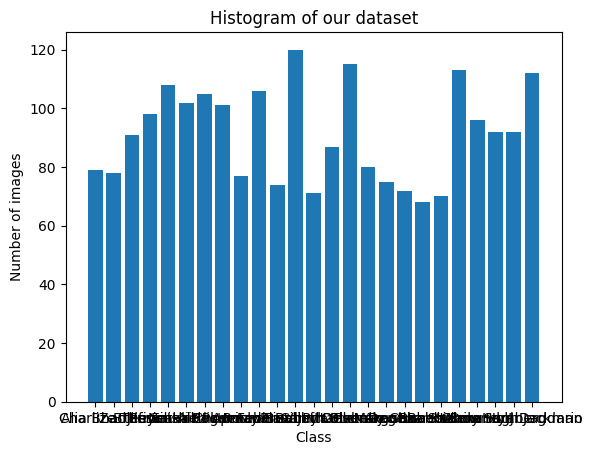

In [13]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.bar(class_counts.keys(), class_counts.values())

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Histogram of our dataset')

# Display the plot
plt.show()

In [14]:
print("The maximum number of images in a class is: ",max(class_counts.values()))
print("The minimum number of images in a class is: ",min(class_counts.values()))

The maximum number of images in a class is:  120
The minimum number of images in a class is:  68


In [15]:
minimum_images_per_person = min(class_counts.values())
number_of_test_images_per_person = 10

In [16]:
train_images_paths = []
train_images_labels = []

test_images_paths = []
test_images_labels = []

for label in classes:
    class_path = os.path.join(dataset_dir,label)
    images_counter = 0
    for image_name in os.listdir(class_path):
        if images_counter >= minimum_images_per_person:
            images_counter = 0
            break
        if images_counter >= number_of_test_images_per_person:
            image_path = os.path.join(class_path,image_name)
            train_images_paths.append(image_path)
            train_images_labels.append(label)
        else:
            image_path = os.path.join(class_path,image_name)
            test_images_paths.append(image_path)
            test_images_labels.append(label)
            
        images_counter = images_counter + 1

print("Number of Training Images = ", len(train_images_paths))
print("Number of Testing Images = ", len(test_images_paths))

Number of Training Images =  1450
Number of Testing Images =  250


In [17]:
embeddings = []
labels = []
counter = 1

for index, image_path in enumerate(train_images_paths):
    label = train_images_labels[index]
    
    # Extract the embeddings
    embedding = extract_embeddings(image_path)
    
    # Only append to lists if embedding is not None
    if embedding is not None:
        embeddings.append(embedding)
        labels.append(label)
    
    print(counter)
    counter += 1

# Print the length of embeddings to verify
print(f"Total embeddings collected: {len(embeddings)}")


I0000 00:00:1742379959.013928      81 service.cc:145] XLA service 0x7ec81c01cf50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742379959.013970      81 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1742379959.013974      81 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


I0000 00:00:1742379964.086195      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

In [18]:
data = {'embedding': embeddings, 'label': labels}
embeddings_dataset = pd.DataFrame(data)
embeddings_dataset = embeddings_dataset.reset_index(drop=True)
embeddings_dataset

,embedding,label
0,"[[-0.065787226, 0.03434124, -0.054456543, -0.0...",Alia Bhatt
1,"[[-0.06330322, 0.086686485, -0.056610815, -0.0...",Alia Bhatt
2,"[[-0.048813745, 0.054409634, -0.023050526, -0....",Alia Bhatt
3,"[[-0.040222313, 0.03085623, -0.0547016, -0.026...",Alia Bhatt
4,"[[-0.047341224, 0.042271182, -0.057032604, -0....",Alia Bhatt
...,...,...
1443,"[[-0.017072387, -0.053576544, -0.011340595, -0...",Hugh Jackman
1444,"[[-0.080780104, -0.056689557, -0.048468135, -0...",Hugh Jackman
1445,"[[-0.05614637, -0.100233026, -0.017840777, -0....",Hugh Jackman
1446,"[[-0.06595588, -0.058123473, -0.039772123, -0....",Hugh Jackman


In [19]:
embeddings_dataset.to_csv('Embeddings Dataset.csv', index=False)

In [20]:
embeddings_dataset.head()

,embedding,label
0,"[[-0.065787226, 0.03434124, -0.054456543, -0.0...",Alia Bhatt
1,"[[-0.06330322, 0.086686485, -0.056610815, -0.0...",Alia Bhatt
2,"[[-0.048813745, 0.054409634, -0.023050526, -0....",Alia Bhatt
3,"[[-0.040222313, 0.03085623, -0.0547016, -0.026...",Alia Bhatt
4,"[[-0.047341224, 0.042271182, -0.057032604, -0....",Alia Bhatt


In [21]:
test_cosines = []
image_to_test = test_images_paths[0]
label_test = test_images_labels[0]
embedding_test = extract_embeddings(image_to_test)
print(image_to_test)
print(label_test)
print(len(embedding_test))
print(embedding_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
/kaggle/input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_4.jpg
Alia Bhatt
1
[[-0.05322821  0.09037081 -0.04509027 -0.07729434 -0.04618416 -0.0884447
   0.03873304  0.04336303  0.05869572  0.01220328  0.05994296 -0.01463622
   0.03966672  0.02118334 -0.09261028 -0.01978742 -0.0305015  -0.01623978
  -0.01037553 -0.09912853  0.05435306 -0.03669364 -0.03877343 -0.02463258
  -0.00600193 -0.10262811 -0.0903645  -0.03332624  0.04002075 -0.03724441
   0.01549874 -0.02062606  0.09810019 -0.03667914  0.09736644  0.05531561
   0.00721213 -0.01137354  0.02383722  0.03127016 -0.08274152 -0.02887023
   0.02900086  0.05478018 -0.02539501  0.00709233 -0.08980269  0.04649115
   0.00358395  0.00758504 -0.02977748 -0.05819057 -0.01755003 -0.00919403
   0.07675625  0.04045266  0.01662738 -0.00849607 -0.04750123 -0.01229082
   0.0254151   0.07791207 -0.0204876  -0.00327719 -0.03460828 -0.05187436
   0.03668965  0.09166185  0.02391224

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


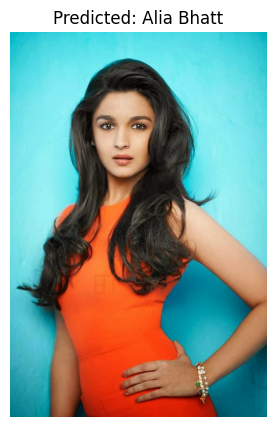

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load and display image with predicted label
def display_image(image_path, predicted_label):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib

    # Display the image
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.axis('off')  # Remove axes for clarity
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

# Test: Get embedding and find predicted label
image_to_test = test_images_paths[0]  # Choose the first image from the test set
label_test = test_images_labels[0]  # Get the true label
embedding_test = extract_embeddings(image_to_test)  # Extract the embedding for the test image

# Make sure the embedding_test is in the correct shape
embedding_test = embedding_test.reshape(1, -1)  # Ensure it's 2D (1, embedding_size)

# Calculate cosine similarity with training embeddings
test_cosines = []
for train_embedding in embeddings:
    train_embedding = train_embedding.reshape(1, -1)  # Ensure each training embedding is also 2D
    cosine_sim = cosine_similarity(embedding_test, train_embedding)
    test_cosines.append(cosine_sim[0][0])

# Find the most similar image
most_similar_index = np.argmax(test_cosines)
predicted_label = train_images_labels[most_similar_index]  # Get the predicted label

# Display the image and the predicted name
display_image(image_to_test, predicted_label)


In [23]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Function to show image
def show_image(image_path, predicted_label, actual_label):
    # Load and display the image using OpenCV
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct display
    
    # Create a plot to show the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis for a cleaner view
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=12)
    plt.show()

# New cell for prediction and display
def predict_and_display(image_path, test_image_label):
    # Extract embedding for the test image
    embedding_test = extract_embeddings(image_path)  # Extract the embedding of the input image

    if embedding_test is None:
        print("No faces detected in the image.")
        return

    # Compute the cosine similarities between the input image's embedding and the embeddings dataset
    similarities = []
    for idx, stored_embedding in enumerate(embeddings):
        similarity = cosine_similarity(embedding_test.reshape(1, -1), stored_embedding.reshape(1, -1))[0][0]
        similarities.append((similarity, idx))  # Store similarity and corresponding index

    # Sort by similarity score, the higher the score, the more similar
    similarities.sort(reverse=True, key=lambda x: x[0])
    
    # Find the predicted label (with the highest similarity score)
    predicted_label = labels[similarities[0][1]]  # Use the label corresponding to the most similar embedding

    # Display the image with predicted and actual label
    show_image(image_path, predicted_label, test_image_label)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


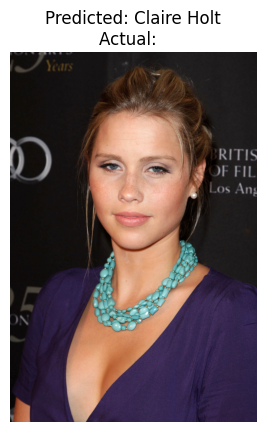

In [24]:
# Test the function with an example image path
image_to_test = "/kaggle/input/face-recognition-dataset/Original Images/Original Images/Claire Holt/Claire Holt_0.jpg"  
label_test = " "  # Provide the actual label here (expected name of the person)

# Call the function to predict and display the image
predict_and_display(image_to_test, label_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


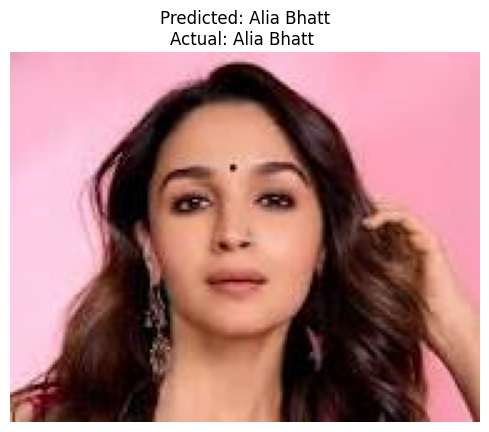

In [25]:
# Test the function with an example image path
image_to_test = "/kaggle/input/random-chrome-images/Untitled.jpeg"  
label_test = "Alia Bhatt "  # Provide the actual label here (expected name of the person)

# Call the function to predict and display the image
predict_and_display(image_to_test, label_test)
